# STUDENT SCORE PREDICTOR

In [50]:
import pandas as pd
df = pd.read_csv('student_exam_scores.csv')

In [51]:
print(df.head())

  student_id  hours_studied  sleep_hours  attendance_percent  previous_scores  \
0       S001            8.0          8.8                72.1               45   
1       S002            1.3          8.6                60.7               55   
2       S003            4.0          8.2                73.7               86   
3       S004            3.5          4.8                95.1               66   
4       S005            9.1          6.4                89.8               71   

   exam_score  
0        30.2  
1        25.0  
2        35.8  
3        34.0  
4        40.3  


In [52]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   student_id          200 non-null    object 
 1   hours_studied       200 non-null    float64
 2   sleep_hours         200 non-null    float64
 3   attendance_percent  200 non-null    float64
 4   previous_scores     200 non-null    int64  
 5   exam_score          200 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 9.5+ KB
None


In [53]:
print(df.describe())

       hours_studied  sleep_hours  attendance_percent  previous_scores  \
count     200.000000   200.000000          200.000000       200.000000   
mean        6.325500     6.622000           74.830000        66.800000   
std         3.227317     1.497138           14.249905        15.663869   
min         1.000000     4.000000           50.300000        40.000000   
25%         3.500000     5.300000           62.200000        54.000000   
50%         6.150000     6.700000           75.250000        67.500000   
75%         9.000000     8.025000           87.425000        80.000000   
max        12.000000     9.000000          100.000000        95.000000   

       exam_score  
count  200.000000  
mean    33.955000  
std      6.789548  
min     17.100000  
25%     29.500000  
50%     34.050000  
75%     38.750000  
max     51.300000  


#### ✔ Enough Data Points
#### ✔ No Missing Values
#### ✔ Values are realistic
Study hours: 1 to 12 hours (reasonable)
Attendance: 50% to 100% → logical
Previous scores: 40 to 95 → realistic
Exam score: 17.1 to 51.3 → realistic
#### ✔ Continuous variables → Perfect for Regression Model
Meaning: Linear Regression can be applied properly

In [77]:
df.rename(columns={
    'student_id': 'Student_Id',
    'hours_studied': 'Hours',
    'sleep_hours': 'Sleep',
    'attendance_percent': 'Attendance',
    'previous_scores': 'PreviousScore',
    'exam_score': 'Score'
}, inplace=True)
# inplace=True meaning "Do the change directly in my existing DataFrame.Don’t create a new one.”

In [55]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Student_Id     200 non-null    object 
 1   Hours          200 non-null    float64
 2   Sleep          200 non-null    float64
 3   Attendance     200 non-null    float64
 4   PreviousScore  200 non-null    int64  
 5   Score          200 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 9.5+ KB
None


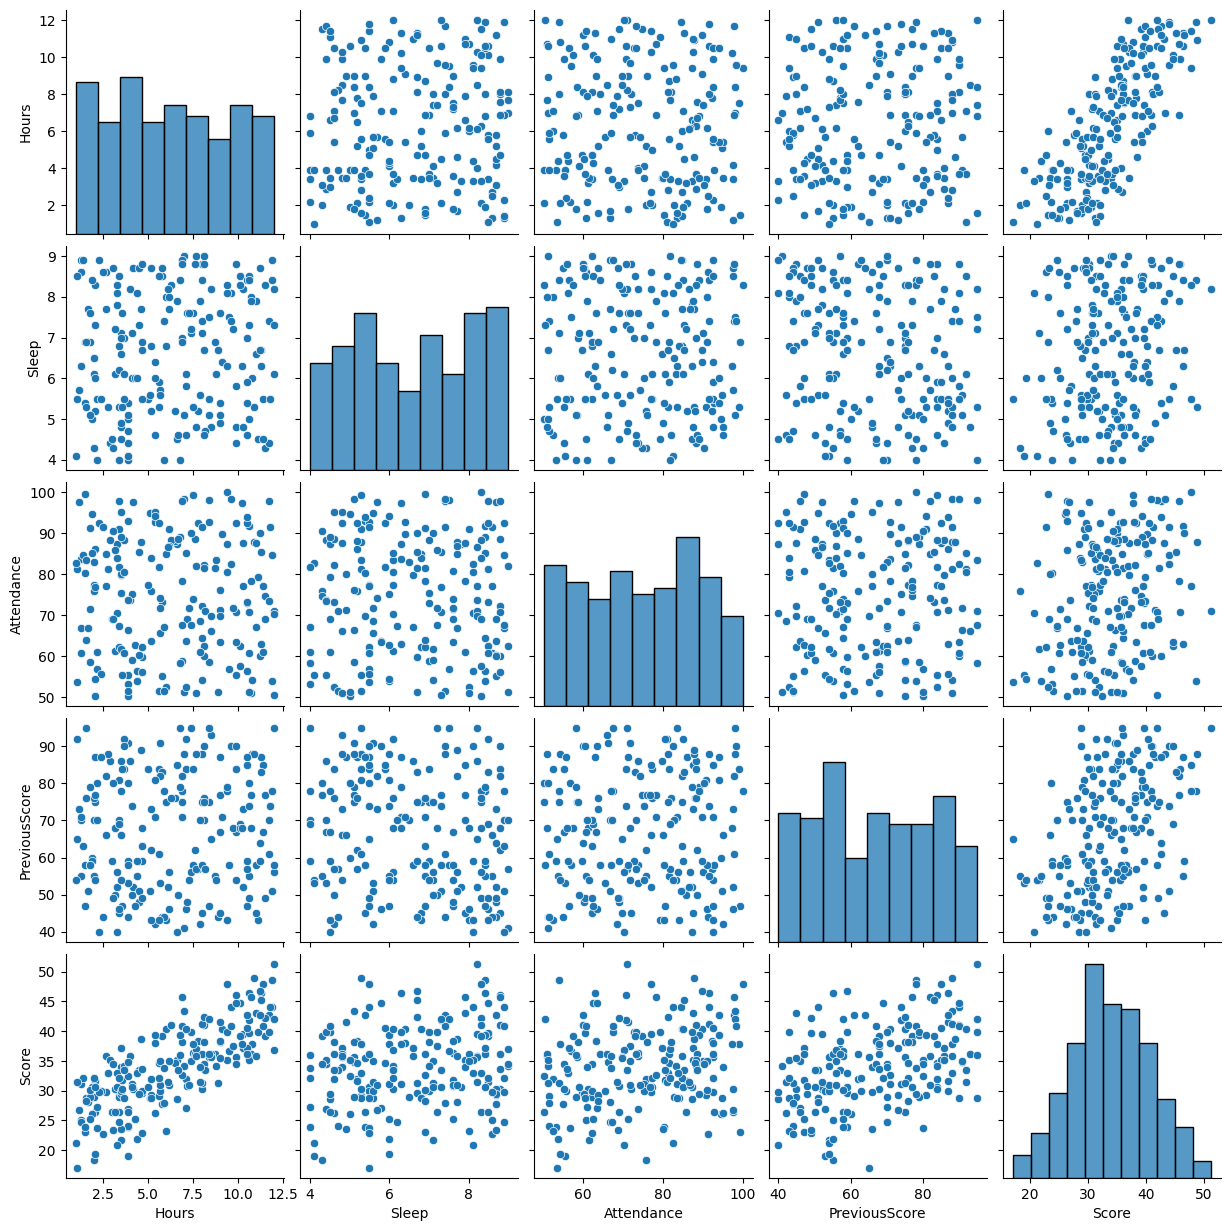

<Axes: >

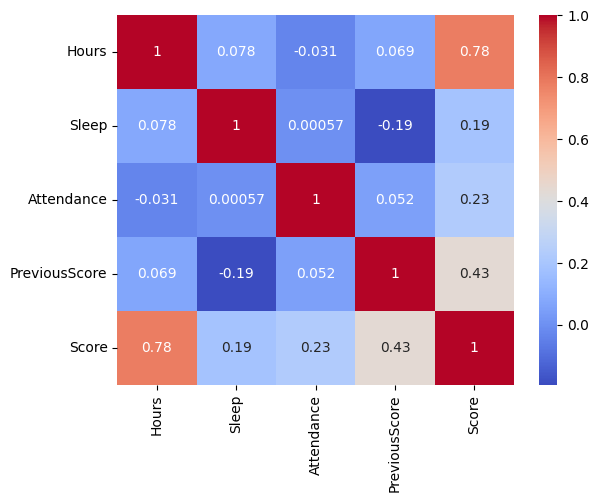

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df) 
plt.show()
numeric_df = df.select_dtypes(include=['float64', 'int64']) 
# This above line of code is significant as it indicates that numeric_df contains only those columns which are having int or float values.
# As corr does not work string values, because it provide info about correlation among features 
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')

In [ ]:
### A pairplot shows the relationship between every pair of features in the dataset.

#### 1️ Diagonal Plots → Distribution (Histogram/KDE)E
##### These show how each column’s values are spread.
##### Examples:
If it is centered normally → normal distribution 
If stretched to one side → skewness
If very wide → high variance
#### 2️ Off-Diagonal Plots → Scatter Plots 
These show the relationship between two features:
Pattern Meaning Upward slanted → Positive correlation
Downward slanted → Negative correlation
Points are close to forming a line → Strong relationship
Points are scattered randomly → Weak/no correlation

In [81]:
# What the Heatmap Shows

# A correlation matrix tells how strongly one feature is related to another.
# Correlation value range:
# +1 → Perfect positive relationship
# 0 → No relationship
# −1 → Perfect negative relationship

In [57]:
X = df[['Hours', 'Sleep', 'Attendance', 'PreviousScore']]
y = df['Score']

In [58]:
print(X)
print(y)

     Hours  Sleep  Attendance  PreviousScore
0      8.0    8.8        72.1             45
1      1.3    8.6        60.7             55
2      4.0    8.2        73.7             86
3      3.5    4.8        95.1             66
4      9.1    6.4        89.8             71
..     ...    ...         ...            ...
195   10.5    5.4        94.0             87
196    7.1    6.1        85.1             92
197    1.6    6.9        63.8             76
198   12.0    7.3        50.5             58
199   10.2    6.3        97.4             68

[200 rows x 4 columns]
0      30.2
1      25.0
2      35.8
3      34.0
4      40.3
       ... 
195    42.7
196    40.4
197    28.2
198    42.0
199    37.8
Name: Score, Length: 200, dtype: float64


In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# random_state=42 → same split every time (for reproducibility)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [90]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
# These are for measuring the model 

In [91]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

mse, rmse, mae

(7.761782668623075, 2.785997607433121, 2.310858235895833)

### Interpretation of Model Metrics
#### Metric	Meaning 	      Your Result	          Interpretation
#### MAE	Avg. mistake in prediction	2.31	On average, predictions are off by 2.3 marks
#### RMSE	Larger mistake penalty	2.79	Some predictions have slightly bigger errors
#### MSE	Mathematical squared error	7.76	Used mainly for optimization

In [92]:
coef = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coef
# This will show which features increase score more strongly.

,Coefficient
Hours,1.549341
Sleep,0.884156
Attendance,0.108949
PreviousScore,0.183034


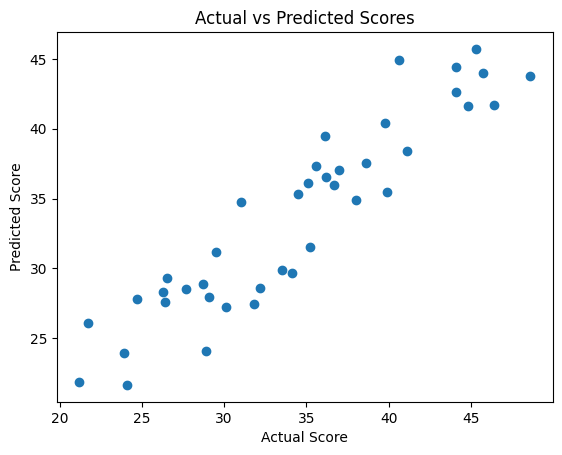

In [93]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Score")
plt.ylabel("Predicted Score")
plt.title("Actual vs Predicted Scores")
plt.show()


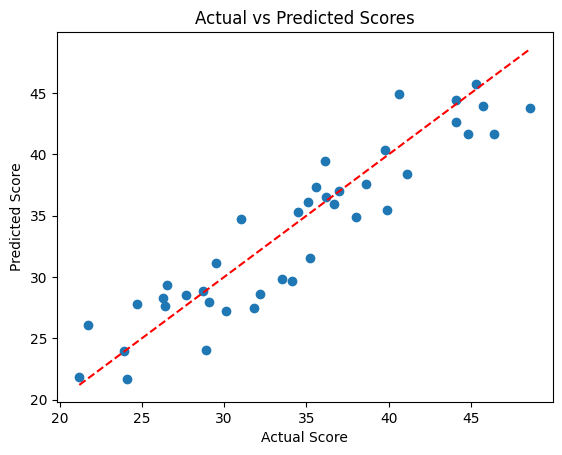

In [94]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
# This line of code is to draw a straight line 
# (Actual score min)  →  (Actual score max)
# ( y_test.min )      →  ( y_test.max )
plt.xlabel("Actual Score")
plt.ylabel("Predicted Score")
plt.title("Actual vs Predicted Scores")
plt.show()

### R² Score (Coefficient of Determination)
#### R² = 1 → Perfect model 🎯
#### R² = 0 → Model is useless ❌
#### R² = 0.85 → Model explains 85% of score variation ✔🔥

In [95]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2

0.8537447137159516

The model predicts student exam performance with high accuracy (R² = 0.85), meaning 85% of score variations are explained by the selected study-related features. Hours studied and previous scores were found to be the strongest predictors. The model is suitable for academic performance analytics.